<a href="https://colab.research.google.com/github/IdealisticINTJ/My_Machine_Learning_Projects/blob/main/Median_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle5"

In [4]:
%cd /content/gdrive/My Drive/Kaggle5

/content/gdrive/My Drive/Kaggle5


In [5]:
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 25.0MB/s]


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [8]:
housing_df = pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


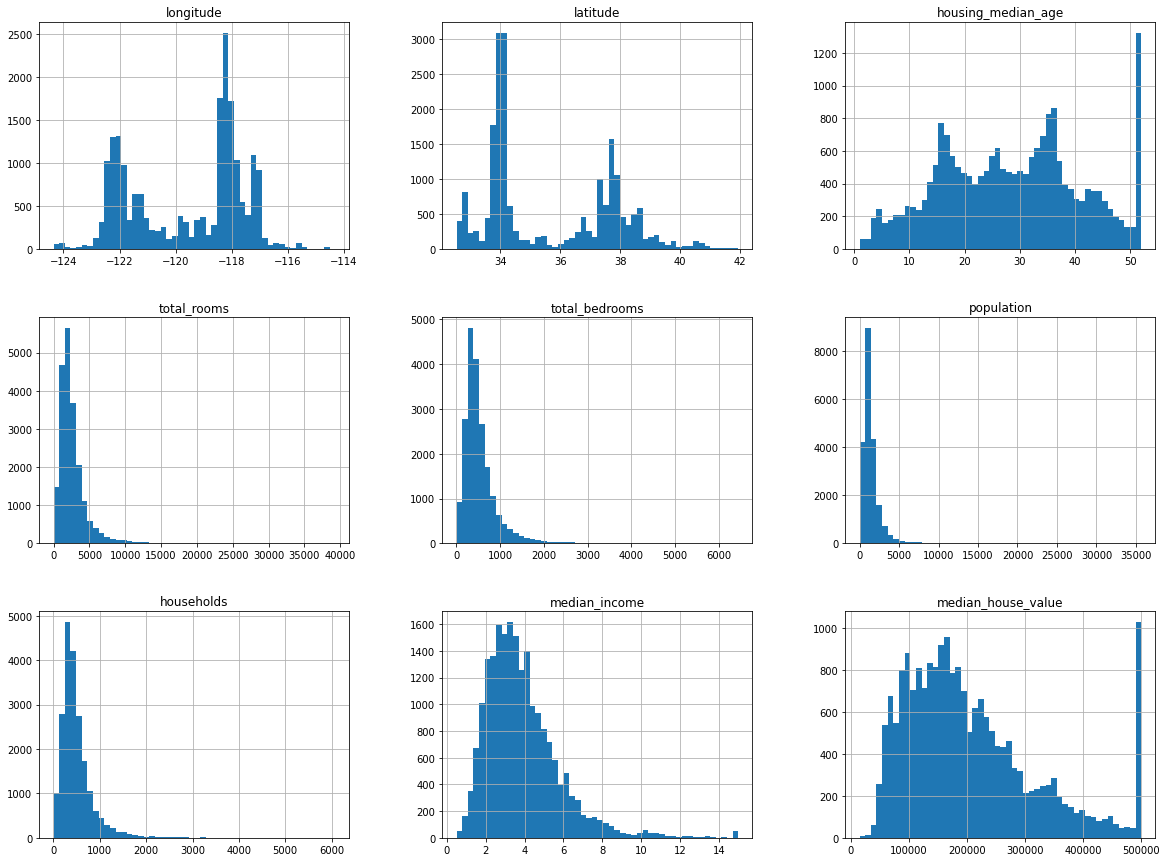

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [14]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing_df, 0.2)
print(F"Length of train set: {len(train_set)}")
print(F"Length of test set: {len(test_set)}")

Length of train set: 16512
Length of test set: 4128


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size = 0.2, random_state=42)
print(F"Length of train set: {len(train_set)}")
print(F"Length of test set: {len(test_set)}")

Length of train set: 16512
Length of test set: 4128


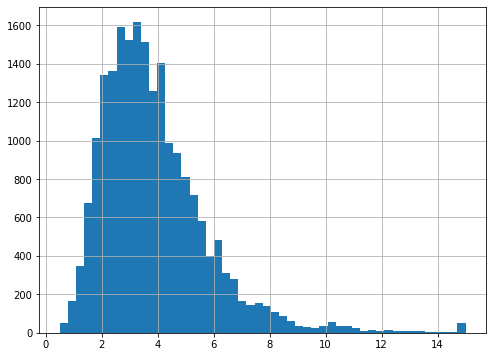

In [16]:
housing_df['median_income'].hist(bins=50, figsize=(8, 6))
plt.show()

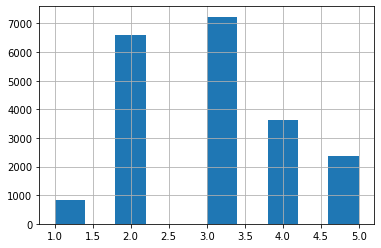

In [17]:
housing_df["income_category"]  = pd.cut(housing_df["median_income"],
                                       bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                       labels=[1, 2, 3, 4, 5])
housing_df["income_category"].hist()
plt.show()

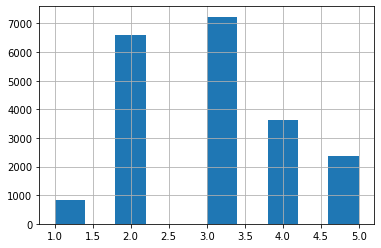

In [18]:
housing_df["income_category"]  = pd.cut(housing_df["median_income"],
                                       bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                       labels=[1, 2, 3, 4, 5])
housing_df["income_category"].hist()
plt.show()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_category"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
    
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [21]:
strat_train_set["income_category"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_category, dtype: float64

In [22]:
for tset in (strat_train_set, strat_test_set):
    tset.drop("income_category", axis=1, inplace=True)

In [23]:
housing = strat_train_set.copy()

[]

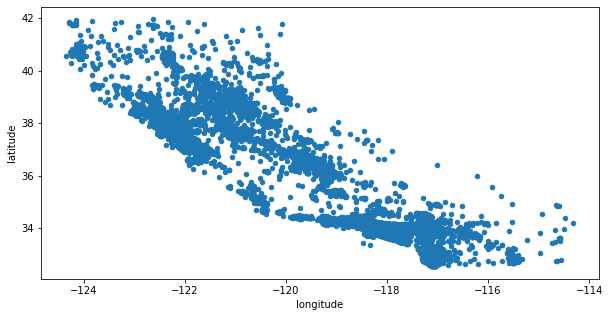

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 5))
plt.plot()

[]

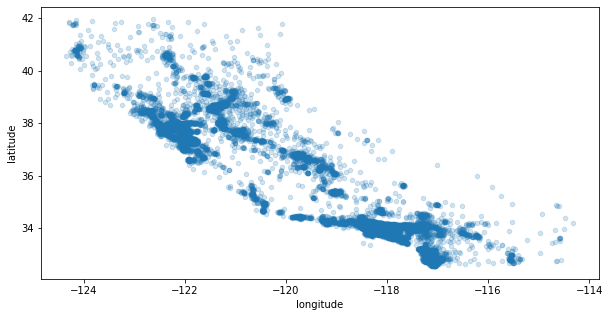

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(10, 5))
plt.plot()

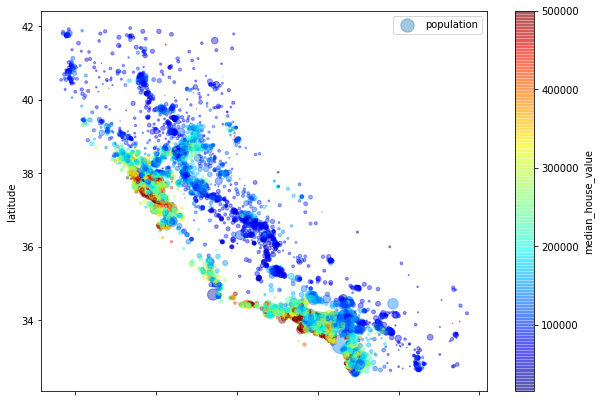

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10, 7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

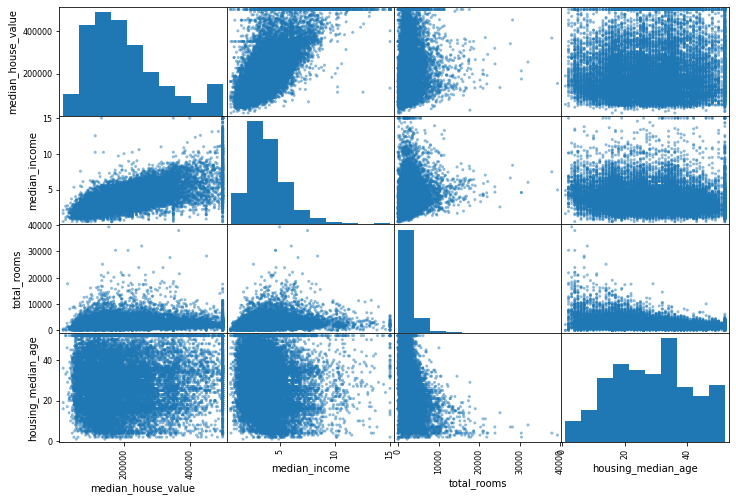

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

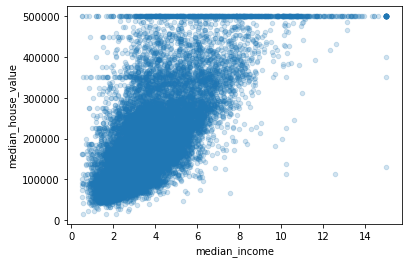

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
plt.show()

In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/ housing["households"]

In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [35]:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [36]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [37]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [38]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [39]:
housing_cat['ocean_proximity'].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [40]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [41]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): #no *kargs and *args
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self #nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx] / X[:, household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [48]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)
housing_extra_attributes[:3]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258]],
      dtype=object)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [50]:
from sklearn.compose import ColumnTransformer

cat_attribs = ["ocean_proximity"]
# list(DataFrame) gives you a list of columns
num_attribs = list(housing_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[:2]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
data_sample_prepared = full_pipeline.transform(housing[:5])
label_sample = housing_labels[:5]
predictions = lin_reg.predict(data_sample_prepared)
labels = list(label_sample)
for i in range(len(labels)):
    print("Prediction : ", predictions[i], " Label :", labels[i], " Error:", predictions[i] - labels[i])

Prediction :  210644.60459285544  Label : 286600.0  Error: -75955.39540714456
Prediction :  317768.80697210826  Label : 340600.0  Error: -22831.193027891743
Prediction :  210956.43331178237  Label : 196900.0  Error: 14056.43331178237
Prediction :  59218.98886849065  Label : 46300.0  Error: 12918.988868490647
Prediction :  189747.55849878554  Label : 254500.0  Error: -64752.44150121446


In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [55]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [56]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [57]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [68523.18275839 65852.73375973 69424.19020324 69870.68166742
 70664.03977402 76771.63373841 71150.24048322 70381.47616699
 76130.24828928 69584.8754804 ]
Mean:  70835.33023210891
Standard Deviation:  3134.774993808202


In [58]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798344


In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18701.977202133265


In [60]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49594.32980856 47255.10546502 50057.37842019 52439.68650843
 49699.97246892 53687.51346263 48653.97975696 48205.22698249
 53005.3647193  50411.83740134]
Mean:  50301.03949938295
Standard Deviation:  2016.6980172960841


In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators' : [3, 10, 30],
        'max_features' : [2, 4, 6, 8, 10]
    },
    {
        'bootstrap' : [False],
        'n_estimators': [3, 10], 
        'max_features': [2, 3, 4]
    }
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [62]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64383.22400342647 {'max_features': 2, 'n_estimators': 3}
55425.60474133235 {'max_features': 2, 'n_estimators': 10}
53036.54752717611 {'max_features': 2, 'n_estimators': 30}
59671.53418320812 {'max_features': 4, 'n_estimators': 3}
52571.30857978014 {'max_features': 4, 'n_estimators': 10}
50564.55683937634 {'max_features': 4, 'n_estimators': 30}
59200.646074371856 {'max_features': 6, 'n_estimators': 3}
52087.52177315244 {'max_features': 6, 'n_estimators': 10}
49843.16687919956 {'max_features': 6, 'n_estimators': 30}
59099.54812846786 {'max_features': 8, 'n_estimators': 3}
51908.69064698978 {'max_features': 8, 'n_estimators': 10}
49974.64210167792 {'max_features': 8, 'n_estimators': 30}
59341.96311878803 {'max_features': 10, 'n_estimators': 3}
52366.90905901661 {'max_features': 10, 'n_estimators': 10}
50143.036328045106 {'max_features': 10, 'n_estimators': 30}
61301.053549704964 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54566.0642602762 {'bootstrap': False, 'max_features'

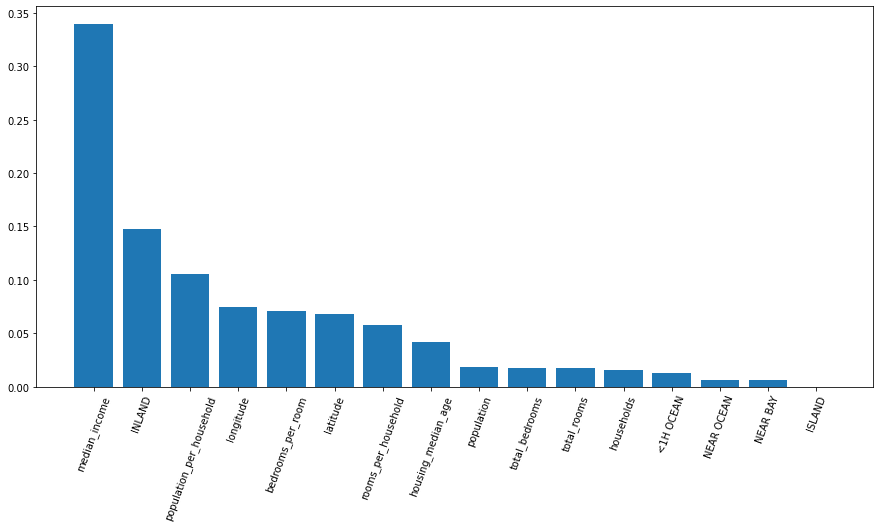

In [65]:
feature_importances = grid_search.best_estimator_.feature_importances_

# Feature importance
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
all_attributes = num_attribs + extra_attribs + cat_one_hot_attribs
results = list(zip(all_attributes, feature_importances))
results.sort(key=lambda x: x[1], reverse=True) 

features = [result[0] for result in results]
importances = [result[1] for result in results]
plt.figure(figsize=(15,7))
plt.xticks(rotation=70)
plt.bar(features,importances)
plt.show()

In [66]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47723.90740911744

In [67]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45778.68008715, 49592.89390897])

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [69]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [70]:
np.array(all_attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'population_per_household',
       'bedrooms_per_room', 'INLAND'], dtype='<U24')

In [71]:
sorted(zip(feature_importances, all_attributes), reverse=True)[:k+1]

[(0.3390971432480971, 'median_income'),
 (0.14777471771311557, 'INLAND'),
 (0.10529839771527252, 'population_per_household'),
 (0.07473349896289311, 'longitude'),
 (0.07068879685342162, 'bedrooms_per_room'),
 (0.067627112689362, 'latitude')]

In [72]:
new_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [73]:
top_k_features_housing_prepared = new_pipeline.fit_transform(housing)

In [74]:
top_k_features_housing_prepared[:2]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ]])

In [75]:
housing_prepared[0:2, top_k_feature_indices]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ]])